# Proyek Akhir: Menyelesaikan Permasalahan Human Resources

- Nama: I Gede Agus Subawa
- Email: subawa116@gmail.com
- Id Dicoding: gedeaguss

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib

### Menyiapkan data yang akan digunakan

In [ ]:
# Dataset import from Dicoding GitHub Repository
dataset_url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv'

# Read dataset
data = pd.read_csv(dataset_url)
data

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

The data contains demographic details, work-related metrics and attrition flag.

* EmployeeId - Employee Identifier
* Attrition - Did the employee attrition? (0=no, 1=yes)
* Age - Age of the employee
* BusinessTravel - Travel commitments for the job
* DailyRate - Daily salary
* Department - Employee Department
* DistanceFromHome - Distance from work to home (in km)
* Education - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* EducationField - Field of Education
* EnvironmentSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* Gender - Employee's gender
* HourlyRate - Hourly salary
* JobInvolvement - 1-Low, 2-Medium, 3-High, 4-Very High
* JobLevel - Level of job (1 to 5)
* JobRole - Job Roles
* JobSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* MaritalStatus - Marital Status
* MonthlyIncome - Monthly salary
* MonthlyRate - Mounthly rate
* NumCompaniesWorked - Number of companies worked at
* Over18 - Over 18 years of age?
* OverTime - Overtime?
* PercentSalaryHike - The percentage increase in salary last year
* PerformanceRating - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* RelationshipSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* StandardHours - Standard Hours
* StockOptionLevel - Stock Option Level
* TotalWorkingYears - Total years worked
* TrainingTimesLastYear - Number of training attended last year
* WorkLifeBalance - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* YearsAtCompany - Years at Company
* YearsInCurrentRole - Years in the current role
* YearsSinceLastPromotion - Years since the last promotion
* YearsWithCurrManager - Years with the current manager

In [ ]:
# Cek nilai unik untuk data kategorikal
for feature in data.select_dtypes(include='object'):
    print(feature)
    print(data[feature].unique(), '\n')

BusinessTravel
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel'] 

Department
['Human Resources' 'Research & Development' 'Sales'] 

EducationField
['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender
['Male' 'Female'] 

JobRole
['Human Resources' 'Healthcare Representative' 'Research Scientist'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Sales Representative'] 

MaritalStatus
['Married' 'Single' 'Divorced'] 

Over18
['Y'] 

OverTime
['Yes' 'No'] 



In [ ]:
#Melihat statistik deskriptif
data.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
data.describe(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


In [ ]:
data_clean = data.drop(['Over18', 'EmployeeCount'], axis=1)
data_clean

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,4,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,3,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,3,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,3,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,4,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,3,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,3,...,2,80,1,6,0,3,4,2,0,0


### Missing and Duplicate Data Handling

In [ ]:
data_clean.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0


* Kolom **Attrition** terdapat nilai null (hilang). Penanganan yang dilakukan yaitu menghapus baris yang kolom **Attrition** hilang. Alasannya karena tidak ada informasi lebih lanjut apakah karyawan keluar atau tidak

In [ ]:
data_clean.dropna(inplace=True)
data_clean.shape

(1058, 33)

In [ ]:
#Cek duplikasi data
data_clean.duplicated().sum()

np.int64(0)

In [ ]:
# Ubah tipe data attrition
data_clean['Attrition'] = data_clean['Attrition'].astype(int)
data_clean['Attrition'].dtypes

dtype('int64')

### Decoding Kolom Kategorikal

In [ ]:
# Mengonversi fitur yang dikodekan dalam DataFrame ke label kategorikal yang sesuai
education_map = {
    1: "Below College",
    2: "College",
    3: "Bachelor",
    4: "Master",
    5: "Doctor"
}
attrition_map = {
    1 : 'Yes',
    0 : 'No'
}

mapping_2 = {
    1 : 'Low',
    2 : 'Medium',
    3 : 'High',
    4 : 'Very High'

}

mapping_3 = {
    1 : 'Low',
    2 : "Good",
    3 : "Excellent",
    4 : "Outstanding"
}
# Konversi ke label kategorikal
data_clean["Education"] = data_clean["Education"].map(education_map)
data_clean["Attrition"] = data_clean["Attrition"].map(attrition_map)
data_clean["EnvironmentSatisfaction"] = data_clean["EnvironmentSatisfaction"].map(mapping_2)
data_clean["JobInvolvement"] = data_clean["JobInvolvement"].map(mapping_2)
data_clean["JobSatisfaction"] = data_clean["JobSatisfaction"].map(mapping_2)
data_clean["PerformanceRating"] = data_clean["PerformanceRating"].map(mapping_3)
data_clean["WorkLifeBalance"] = data_clean["WorkLifeBalance"].map(mapping_3)
data_clean["RelationshipSatisfaction"] = data_clean["RelationshipSatisfaction"].map(mapping_2)

data_clean[['Education','Attrition','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',"PerformanceRating","WorkLifeBalance"]]

,Education,Attrition,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,WorkLifeBalance
1,College,Yes,Low,Low,Medium,Excellent,Low
2,Master,Yes,Low,High,High,Excellent,Outstanding
3,Bachelor,No,High,High,Medium,Excellent,Outstanding
6,College,No,Medium,Low,Very High,Outstanding,Good
7,Bachelor,Yes,Very High,High,Low,Excellent,Excellent
...,...,...,...,...,...,...,...
1464,College,Yes,Medium,Medium,Low,Excellent,Good
1465,Bachelor,No,High,High,High,Excellent,Outstanding
1467,Below College,Yes,High,High,Very High,Excellent,Good
1468,College,No,High,High,High,Excellent,Excellent


## Data Understanding

In [ ]:
data.describe(include='all')

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


### Attrition Rate

In [ ]:
jumlah_keluar = data_clean['Attrition'].str.lower().eq('yes').sum()
total_karyawan = data_clean['Attrition'].notna().sum()

attrition_rate = jumlah_keluar / total_karyawan
print(f"Attrition Rate: {attrition_rate:.2%}")

Attrition Rate: 16.92%


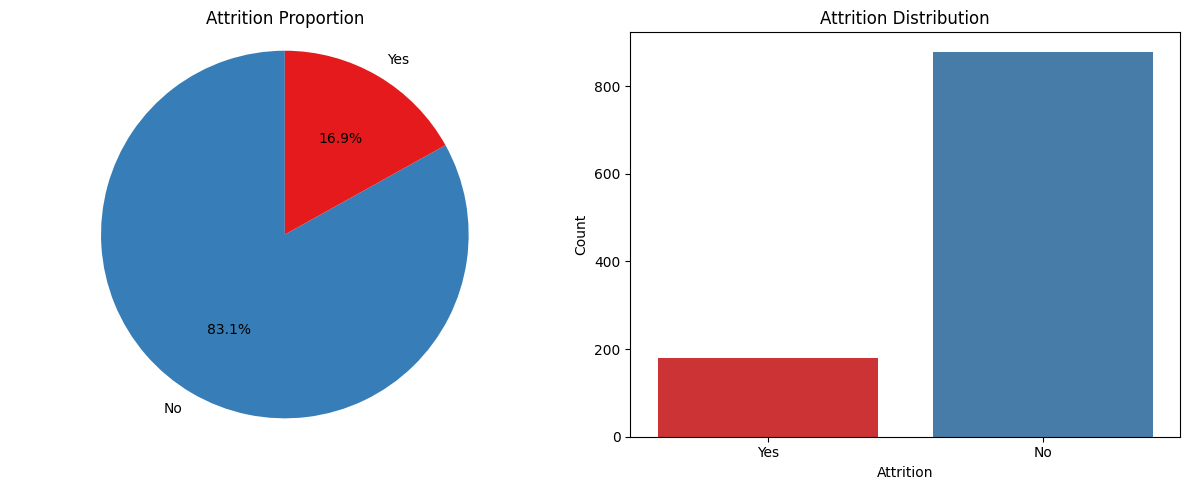

In [ ]:
attrition_counts = data_clean['Attrition'].value_counts()
labels = attrition_counts.index
sizes = attrition_counts.values

# Buat plot berdampingan
plt.figure(figsize=(12, 5))  # Ukuran figure

# Pie chart
colors = ['#E41A1C' if label == 'Yes' else '#377EB8' for label in labels]
plt.subplot(1, 2, 1)  # (baris, kolom, index)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Attrition Proportion')
plt.axis('equal')

# Bar chart
plt.subplot(1, 2, 2)
sns.countplot(data=data_clean, x='Attrition', palette='Set1')
plt.title('Attrition Distribution')
plt.ylabel('Count')
plt.xlabel('Attrition')

plt.tight_layout()
plt.show()

Kesimpulan:
* Sebagian besar karyawan tetap bekerja di perusahaan, ditunjukkan oleh proporsi sebesar 83.1% atau sekitar 800 karyawan yang tidak mengalami attrition.
* Tingkat attrition sekitar 16.9% dari total karyawan yang berhenti bekerja.

### Categorical Analysis

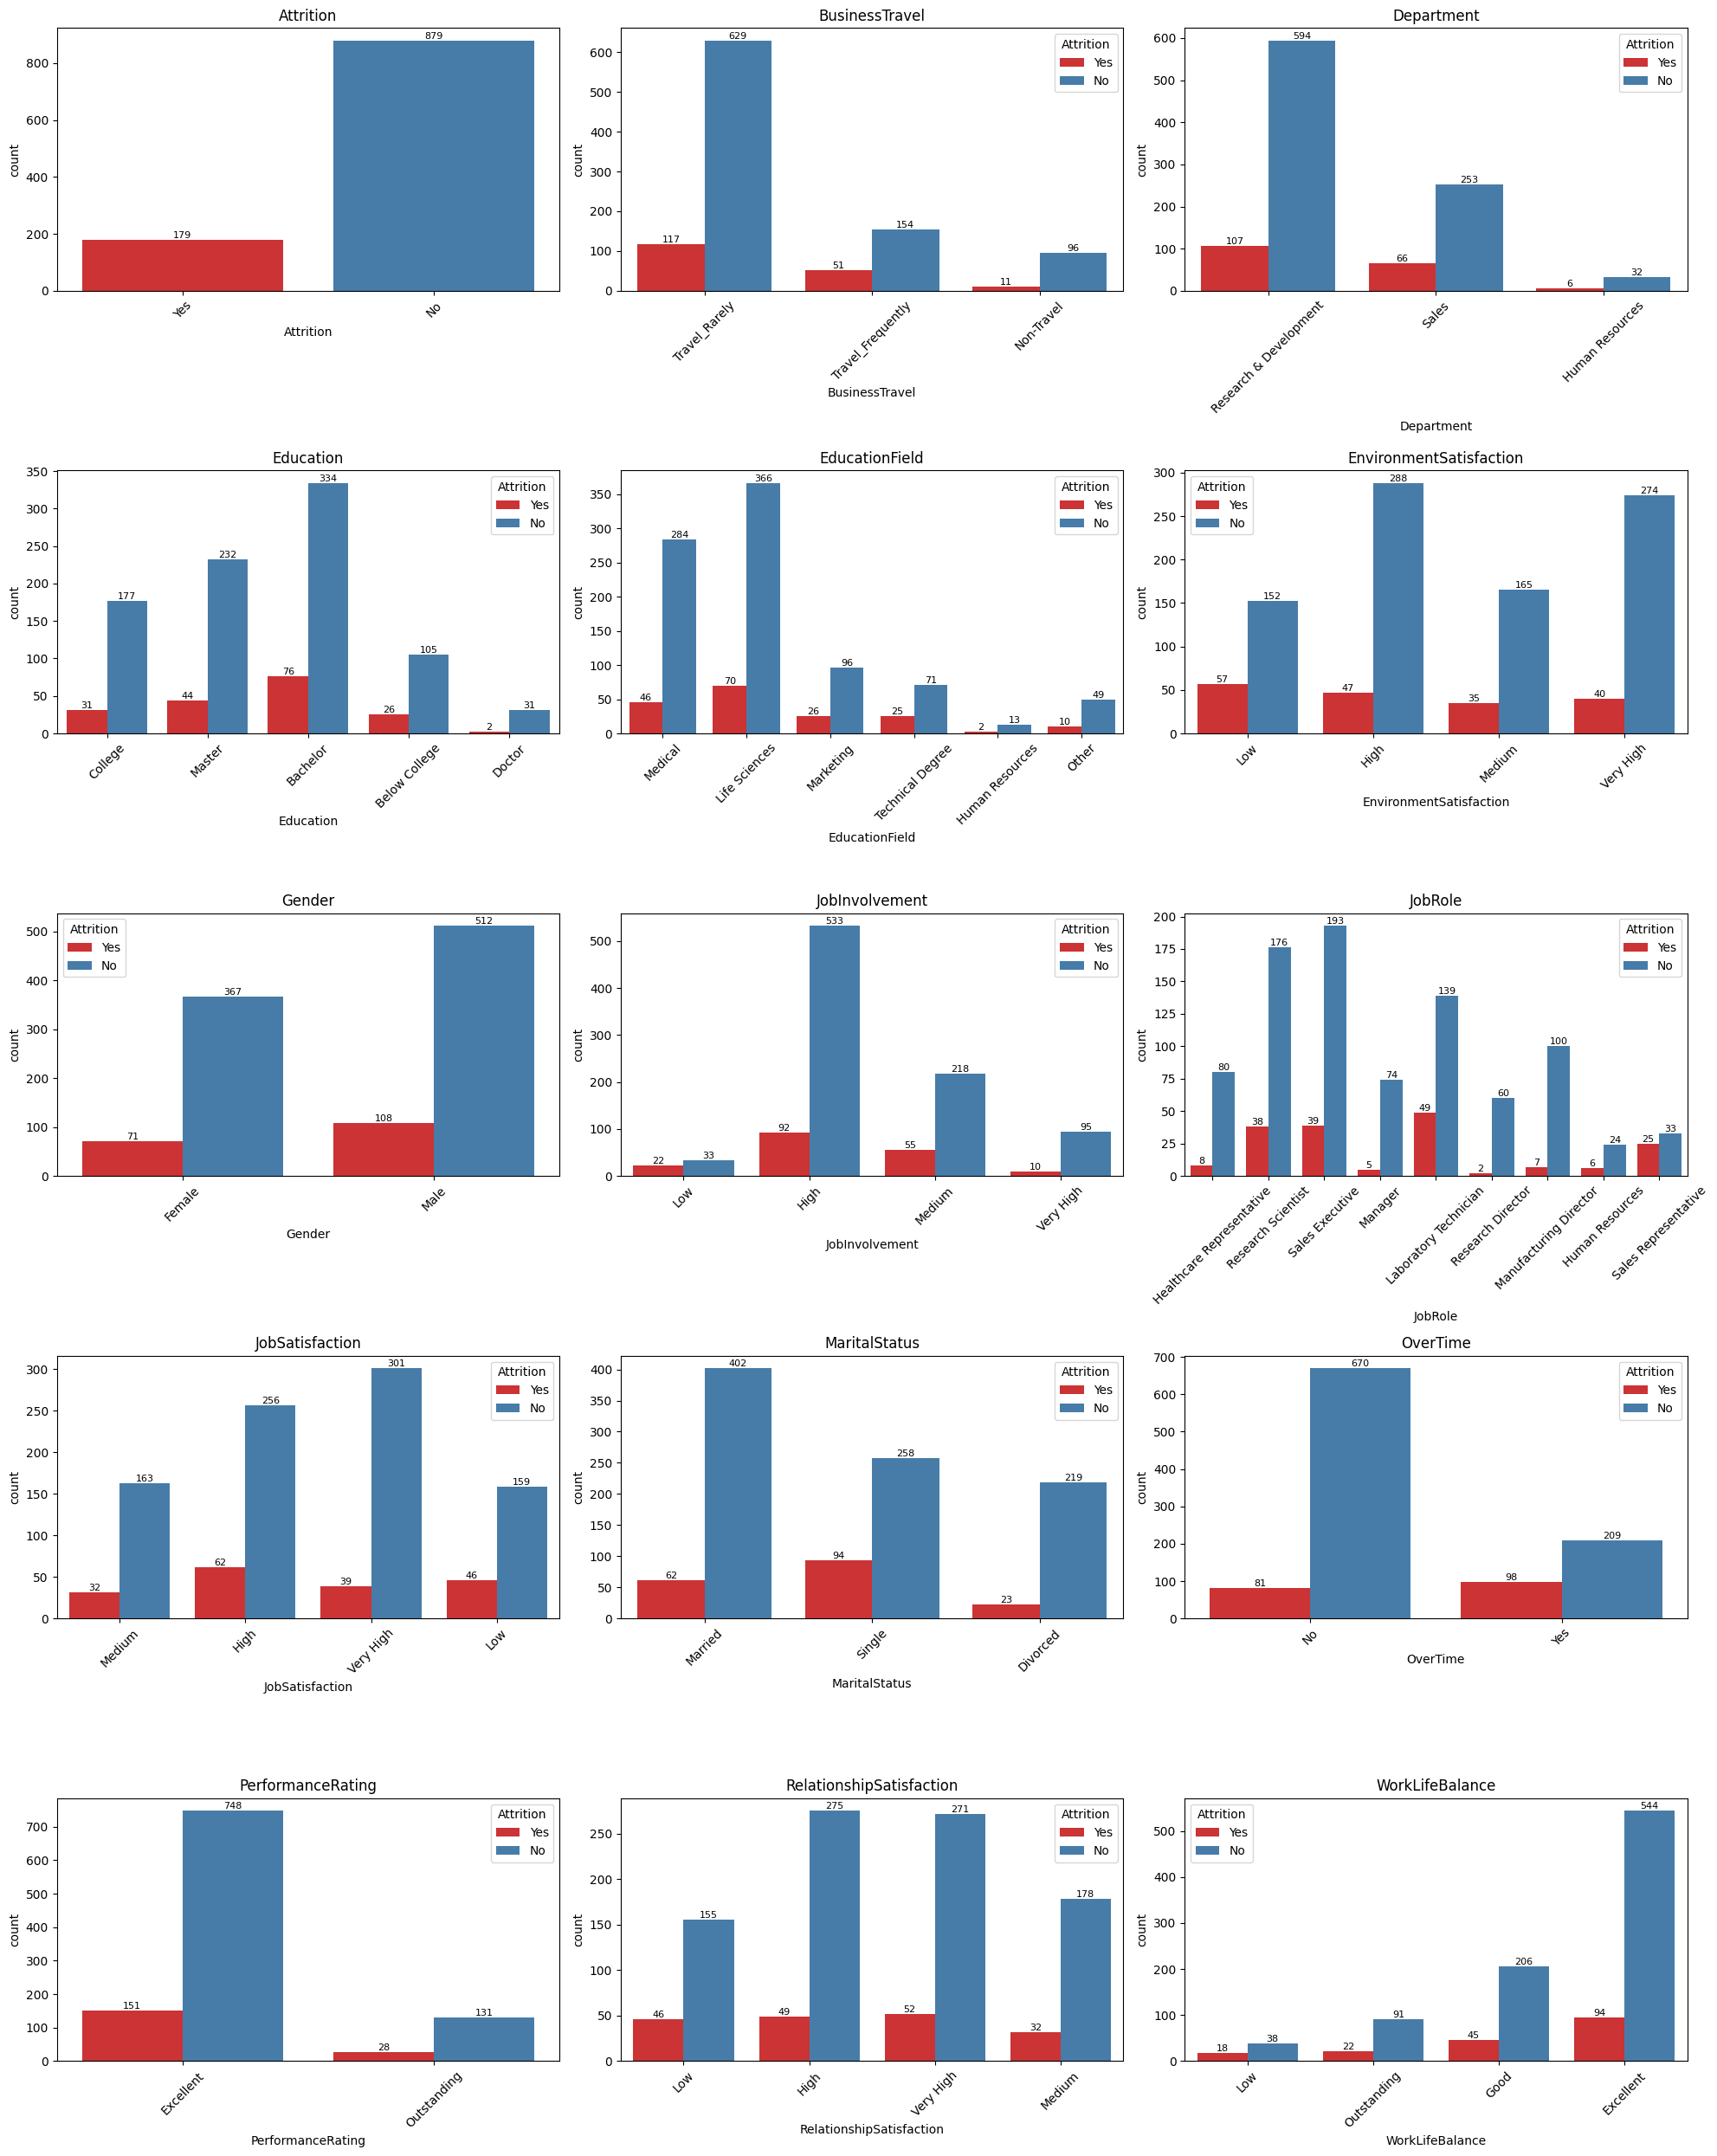

In [ ]:
cat_features = data_clean.select_dtypes(include='object').columns

# Set ukuran figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 25))
axes = axes.flatten()  # Ubah jadi 1 dimensi agar mudah diakses dengan index

for idx, feature in enumerate(cat_features):
    ax = axes[idx]
    sns.countplot(data=data_clean, x=feature, hue='Attrition', ax=ax, palette='Set1')
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=8)
    ax.set_title(feature)
    ax.tick_params(axis='x', rotation=45)

# Matikan sumbu kosong jika jumlah fitur kurang dari jumlah subplot
for i in range(len(cat_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Kesimpulan:
* Departemen Sales memiliki attrition yang lebih tinggi dibandingkan RnD dan Human Resources
* Karyawan yang sering lembur (overtime) memiliki tingkat attrition yang tinggi. Lembur yang berlebihan bisa menyebabkan kelelahan dan keiginan untuk resign
* Sales Executive memiliki jumlah attrition yang tinggi dan mungkin disebabkan oleh beban kerja atau target pekerjaan
* Karyawan single cenderung lebih tinggi kemungkinan keluar. Hal ini karena mungkin lebih fleksibel untuk berpindah pekerjaan atau keinginan untuk eksplor pekerjaan
* Karyawan berjenis kelamin laki-laki memiliki jumlah attrition tertinggi dan mayoritas karyawan di perusahaan adalah laki-laki

### Numerical Analysis

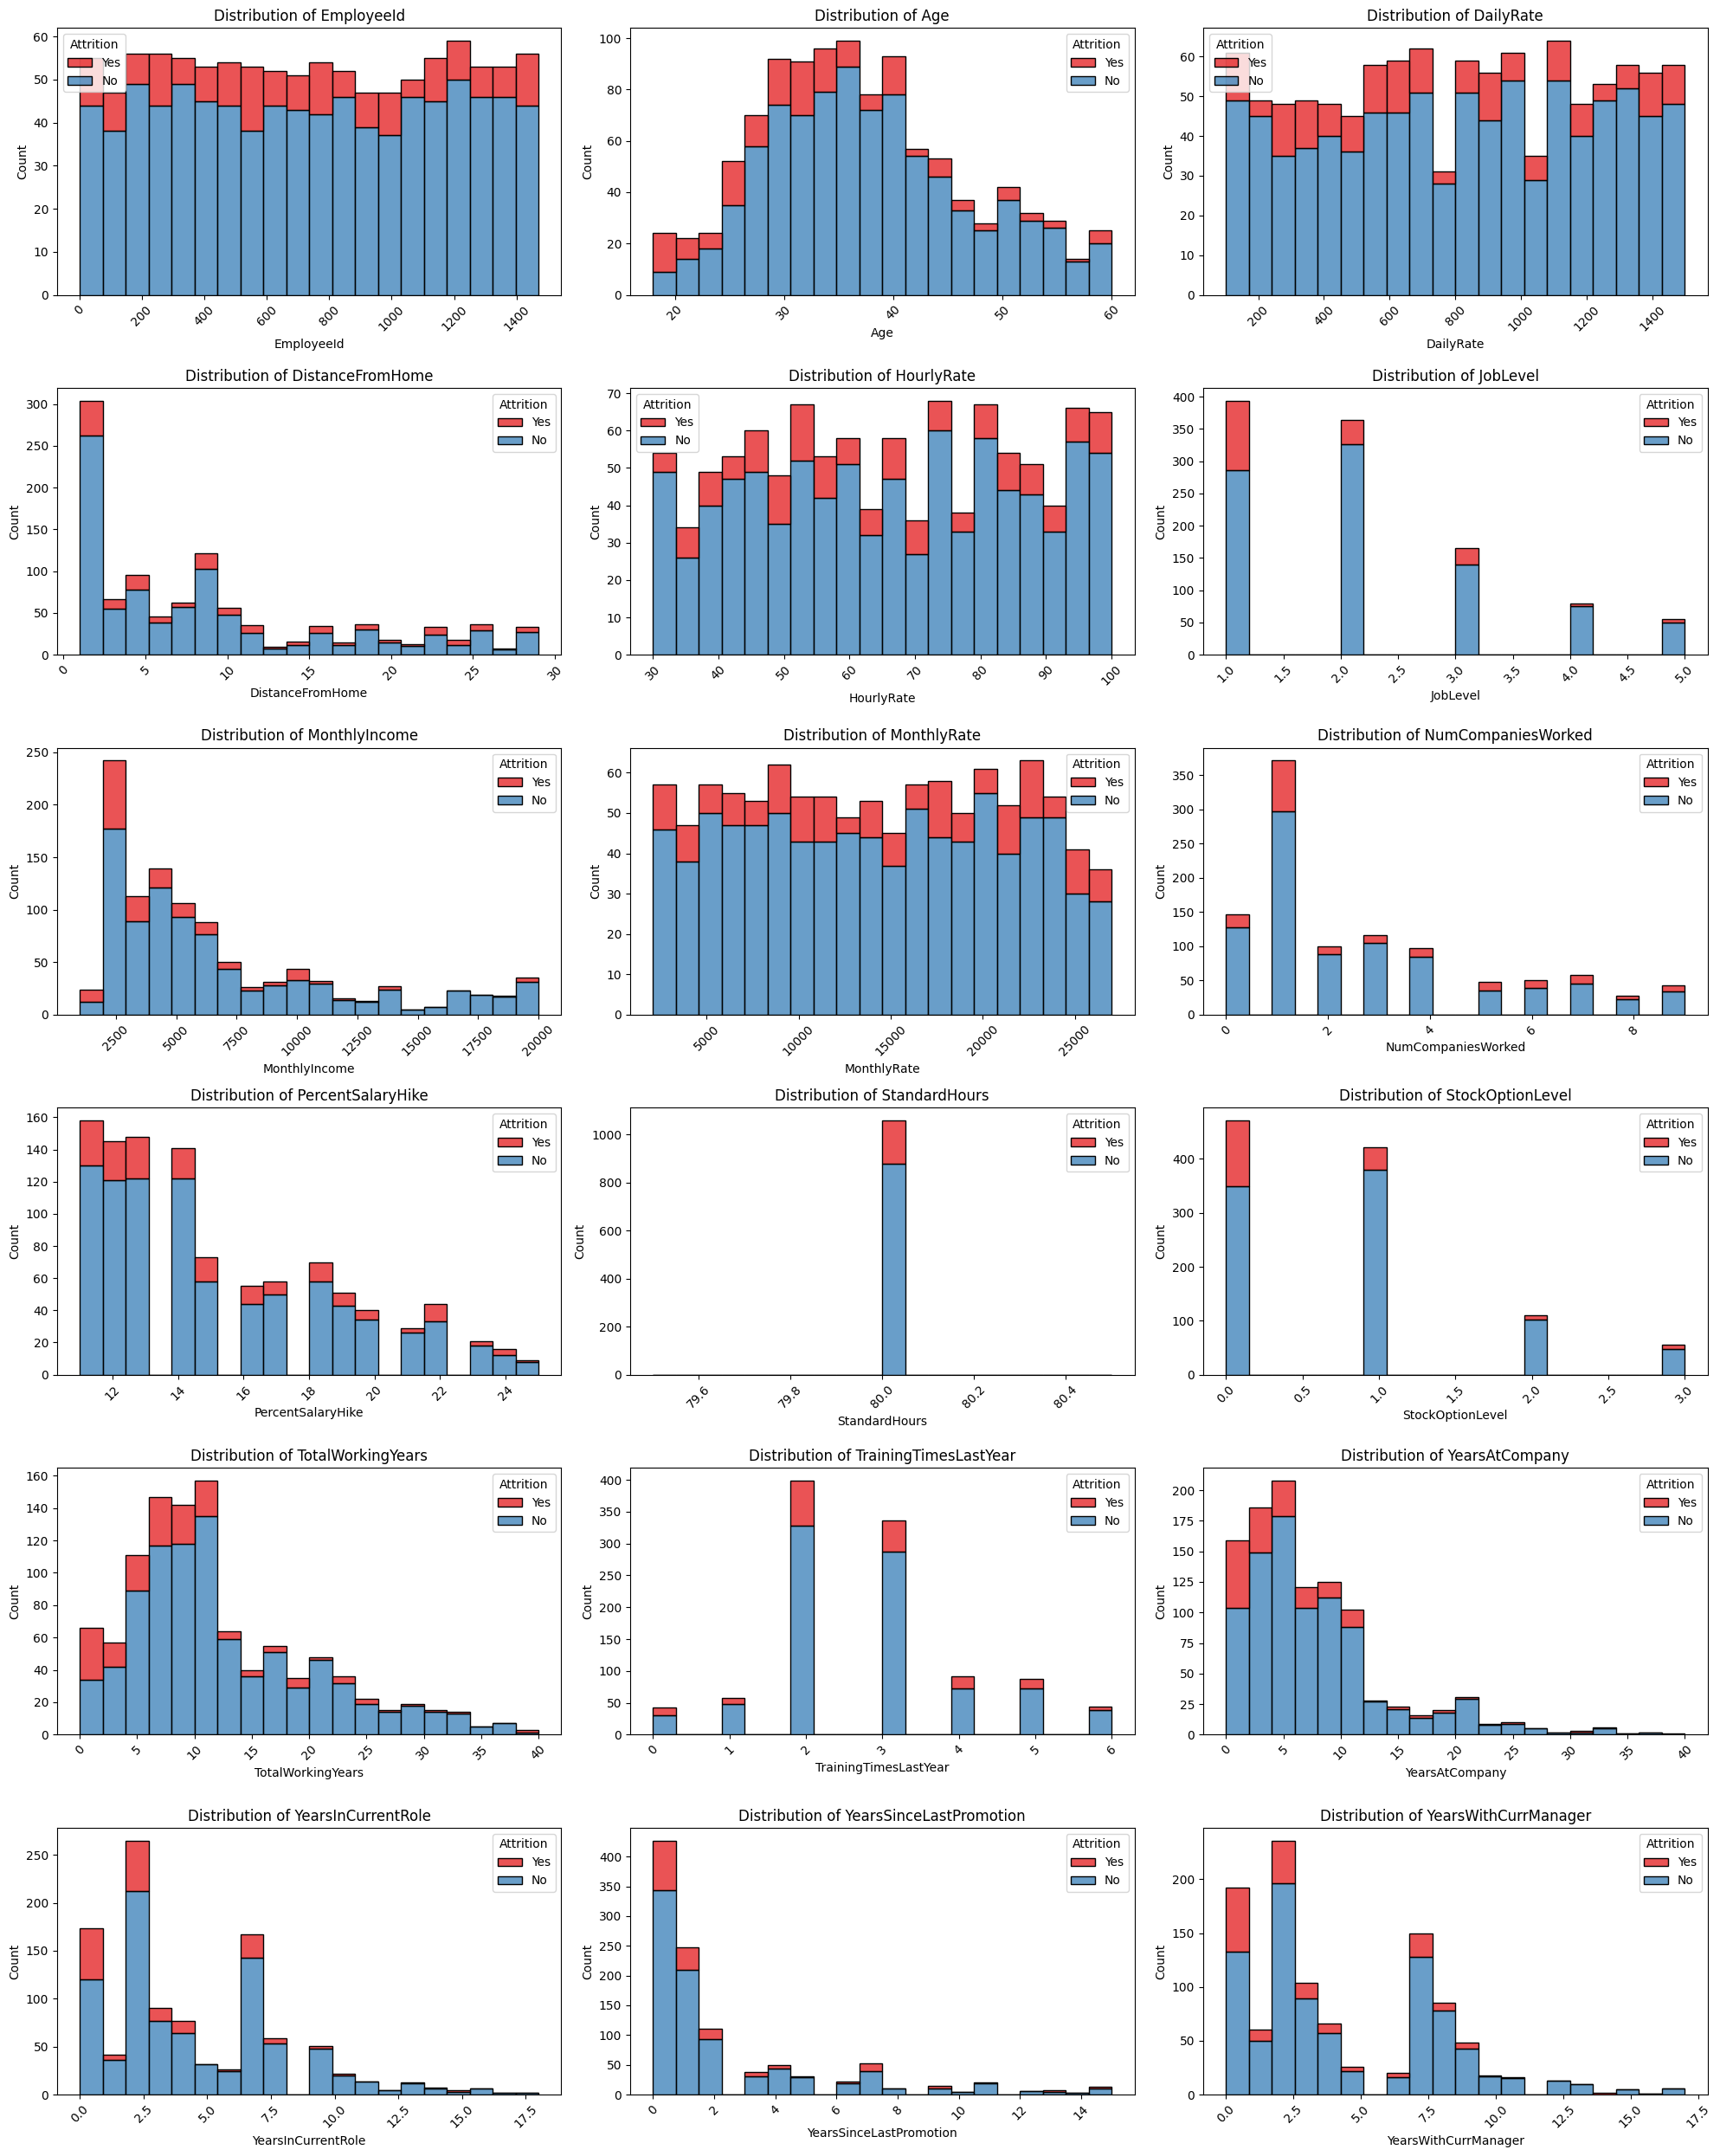

In [ ]:
# Pilih kolom numerikal
num_features = data_clean.select_dtypes(include=['int64', 'float64']).columns

# Setup grid 5x3
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 25))
axes = axes.flatten()

for idx, feature in enumerate(num_features):
    ax = axes[idx]
    sns.histplot(data=data_clean, x=feature, hue='Attrition', multiple='stack', bins=20, ax=ax, palette='Set1')
    ax.set_title(f'Distribution of {feature}')
    ax.tick_params(axis='x', rotation=45)

# Hapus subplot kosong jika kolom numerik < jumlah subplot
for i in range(len(num_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Kesimpulan:
* Rentang usia 20 - 35 tahun memiliki jumlah karyawan yang resign. Hal ini memungkinkan berada dalam fase awal karir dan sedang mencari peluang yang lebih sesuai
* Attrition lebih tinggi pada karyawan dengan pengalaman kerja total yang masih rendah (di bawah 10 tahun)
* Karyawan dengan bergaji rendah cenderung mempunyai attrition yang lebih tinggi
* Karyawan dengan masa kerja lebih singkat di perusahaan, di posisi saat ini, dan dengan manajer saat ini menunjukkan tingkat attrition yang lebih tinggi.
* Karyawan yang tidak pernah mendapatkan promosi selama bertahun-tahun lebih banyak yang keluar

## Data Preparation / Preprocessing

In [ ]:
data_clean = data_clean.drop(['EmployeeId'], axis=1)
data_clean

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,Female,...,Low,80,0,15,2,Low,1,0,0,0
2,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,Male,...,High,80,3,18,2,Outstanding,10,0,2,7
3,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,Female,...,Very High,80,1,23,2,Outstanding,20,4,4,8
6,40,No,Travel_Rarely,1124,Sales,1,College,Medical,Medium,Male,...,High,80,3,6,2,Good,4,3,0,2
7,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,Male,...,Very High,80,1,24,2,Excellent,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,28,Yes,Non-Travel,1366,Research & Development,24,College,Technical Degree,Medium,Male,...,Low,80,0,10,2,Good,10,7,1,9
1465,38,No,Travel_Rarely,168,Research & Development,1,Bachelor,Life Sciences,High,Female,...,Very High,80,0,10,4,Outstanding,1,0,0,0
1467,28,Yes,Travel_Rarely,1485,Research & Development,12,Below College,Life Sciences,High,Female,...,Very High,80,0,1,4,Good,1,1,0,0
1468,40,No,Non-Travel,458,Research & Development,16,College,Life Sciences,High,Male,...,Medium,80,1,6,0,Excellent,4,2,0,0


### Encoding dan Normalisasi

In [ ]:
data_kategorikal = data_clean.select_dtypes(include='object').columns
numerical = data_clean.select_dtypes(include='number').columns

In [ ]:
#Encoding dengan teknik Label encoding
le = LabelEncoder()
data_clean[data_kategorikal] = data_clean[data_kategorikal].apply(le.fit_transform)

In [ ]:
#Normalisasi dengan teknik Min Max
scaler = MinMaxScaler()
data_clean[numerical] = scaler.fit_transform(data_clean[numerical])

In [ ]:
data_clean.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,0.452381,1,2,0.743737,1,0.357143,2,3,1,0,...,1,0.0,0.000000,0.375,0.333333,2,0.025,0.000000,0.000000,0.000000
2,0.785714,1,2,0.874016,1,0.107143,4,1,1,1,...,0,0.0,1.000000,0.450,0.333333,3,0.250,0.000000,0.133333,0.411765
3,0.571429,0,1,0.324266,2,0.892857,0,2,0,0,...,3,0.0,0.333333,0.575,0.333333,3,0.500,0.222222,0.266667,0.470588
6,0.523810,0,2,0.731568,2,0.000000,2,3,2,1,...,0,0.0,1.000000,0.150,0.333333,1,0.100,0.166667,0.000000,0.117647
7,0.880952,1,2,0.445956,1,0.035714,0,3,3,1,...,3,0.0,0.333333,0.600,0.333333,0,0.125,0.111111,0.066667,0.235294


### Pemisahan Data

In [ ]:
X = data_clean.drop(['Attrition'], axis=1)
y = data_clean['Attrition']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (846, 31)
X_test shape : (212, 31)
y_train shape : (846,)
y_test shape : (212,)


## Modeling

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

## Evaluation

In [ ]:
print("🔎 Random Forest Evaluation:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi Random Forest: {accuracy_rf:.4f}")

🔎 Random Forest Evaluation:
[[173   0]
 [ 35   4]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       173
           1       1.00      0.10      0.19        39

    accuracy                           0.83       212
   macro avg       0.92      0.55      0.55       212
weighted avg       0.86      0.83      0.78       212

Akurasi Random Forest: 0.8349


In [ ]:
print("🔎 XGBoost Evaluation:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Akurasi XGBoost: {accuracy_xgb:.4f}")

🔎 XGBoost Evaluation:
[[169   4]
 [ 24  15]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       173
           1       0.79      0.38      0.52        39

    accuracy                           0.87       212
   macro avg       0.83      0.68      0.72       212
weighted avg       0.86      0.87      0.85       212

Akurasi XGBoost: 0.8679


In [ ]:
joblib.dump(xgb_model, 'model_xgb.joblib')

['model_xgb.joblib']

## Deployment

Setelah model machine learning (XGBoost) dilatih untuk memprediksi kemungkinan karyawan melakukan attrition (keluar dari perusahaan), tahap implementasi dilakukan dengan menggunakan dataset baru yang kolom Attrition-nya bernilai null atau kosong.

Hal ini berarti bahwa dataset tersebut berisi data karyawan yang masih aktif atau belum diketahui status keluar/tidaknya, sehingga model digunakan untuk memprediksi kemungkinan attrition berdasarkan pola-pola yang telah dipelajari dari data sebelumnya.

In [ ]:
# Menggunakan data yang kolom "Attrition" null
data_deploy = data[data['Attrition'].isna()].copy()
data_deploy = data_deploy.drop(['Attrition', 'EmployeeId','Over18', 'EmployeeCount'], axis=1)
data_deploy

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,Travel_Frequently,1444,Human Resources,1,4,Other,4,Male,88,...,2,80,1,7,2,3,6,2,1,2
4,40,Travel_Rarely,1194,Research & Development,2,4,Medical,3,Female,98,...,2,80,3,20,2,3,5,3,0,2
5,29,Travel_Rarely,352,Human Resources,6,1,Medical,4,Male,87,...,4,80,0,1,3,3,1,0,0,0
12,47,Travel_Rarely,571,Sales,14,3,Medical,3,Female,78,...,3,80,1,11,4,2,5,4,1,2
18,25,Travel_Frequently,772,Research & Development,2,1,Life Sciences,4,Male,77,...,3,80,2,7,6,3,7,7,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,24,Travel_Frequently,567,Research & Development,2,1,Technical Degree,1,Female,32,...,3,80,0,6,2,3,6,3,1,3
1447,42,Travel_Frequently,288,Research & Development,2,3,Life Sciences,4,Male,40,...,3,80,1,24,3,1,20,8,13,9
1448,38,Travel_Rarely,437,Sales,16,3,Life Sciences,2,Female,90,...,2,80,0,8,5,4,3,2,1,2
1462,41,Travel_Rarely,1206,Sales,23,2,Life Sciences,4,Male,80,...,4,80,0,21,2,3,2,0,0,2


In [ ]:
data_deploy_1 =data_deploy.copy()
numerical = data_deploy_1.select_dtypes(exclude='object').columns.tolist()
categorical = data_deploy_1.select_dtypes(include='object').columns.tolist()

data_deploy_1[categorical] = data_deploy_1[categorical].apply(LabelEncoder().fit_transform)
data_deploy_1[numerical] = MinMaxScaler().fit_transform(data_deploy_1[numerical])

In [ ]:
model = joblib.load('/content/model_xgb.joblib')

In [ ]:
X_new = data_deploy_1
y_pred = model.predict(data_deploy_1)

In [ ]:
# Tambahkan hasil prediksi ke kolom Attrition
data_deploy['Attrition'] = y_pred

#tampil sebagai string
data_deploy['Attrition'] = data_deploy['Attrition'].map({0: 'No', 1: 'Yes'})

In [ ]:
data_deploy

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,38,Travel_Frequently,1444,Human Resources,1,4,Other,4,Male,88,...,80,1,7,2,3,6,2,1,2,No
4,40,Travel_Rarely,1194,Research & Development,2,4,Medical,3,Female,98,...,80,3,20,2,3,5,3,0,2,No
5,29,Travel_Rarely,352,Human Resources,6,1,Medical,4,Male,87,...,80,0,1,3,3,1,0,0,0,Yes
12,47,Travel_Rarely,571,Sales,14,3,Medical,3,Female,78,...,80,1,11,4,2,5,4,1,2,No
18,25,Travel_Frequently,772,Research & Development,2,1,Life Sciences,4,Male,77,...,80,2,7,6,3,7,7,0,7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,24,Travel_Frequently,567,Research & Development,2,1,Technical Degree,1,Female,32,...,80,0,6,2,3,6,3,1,3,Yes
1447,42,Travel_Frequently,288,Research & Development,2,3,Life Sciences,4,Male,40,...,80,1,24,3,1,20,8,13,9,No
1448,38,Travel_Rarely,437,Sales,16,3,Life Sciences,2,Female,90,...,80,0,8,5,4,3,2,1,2,No
1462,41,Travel_Rarely,1206,Sales,23,2,Life Sciences,4,Male,80,...,80,0,21,2,3,2,0,0,2,Yes
